In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df1=pd.read_excel('소부장 무역 소분류.xlsx')
df2=pd.read_excel('소부장 무역 중분류.xlsx')
df3=pd.read_excel('무역특화지수.xlsx')
df4=pd.read_excel('무역특화지수 중분류.xlsx')

In [4]:
df1

,분류,2012수출,2012수입,2013수출,2013수입,2014수출,2014수입,2015수출,2015수입,2016수출,...,2018수출,2018수입,2019수출,2019수입,2020수출,2020수입,2021수출,2021수입,2022수출,2022수입
0,제사및방적,529983439,1198901056,528921692,1255497311,486965312,1074384439,383076586,1012241185,303614391,...,243541370,1049361261,208800575,852929308,121550131,719596653,185124109,1038971068,102847413,605590311
1,면방적,282753738,584523705,311580383,656219084,289783125,523446281,229760139,470469073,160861750,...,126817166,538891368,92996249,426034683,54992318,393257845,102965615,652031921,47767733,359018638
2,모방적,39270853,28142625,31117356,30072094,20339409,32177696,20365368,43589371,23088844,...,20653379,60186810,31687403,65475326,18856292,50192094,20820375,54408013,18400480,38801710
3,화학섬유방적,107039721,536413822,84531029,512231858,88457356,447363055,66693961,420722644,58874613,...,47821401,392905991,41827322,310246543,20838709,239627716,25911166,293870170,12794107,185529440
4,연사및가공사,100373023,23283106,100878774,25950278,87632632,26532867,65802807,22666658,60146062,...,47509808,11546075,41061106,11029369,26431067,9647933,35414293,11071656,23832712,6598030
5,기타방적,546104,26537798,814150,31023997,752790,44864540,454311,54793439,643122,...,739616,45831017,1228495,40143387,431745,26871065,12660,27589308,52381,15642493
6,직물직조,640542811,922397664,649201504,973716433,675014269,960578810,615431664,954658938,552662529,...,598329516,881712440,589895712,849557924,423080485,796308773,486692512,914094794,288434570,569392151
7,면직물직조,35314580,359157027,38726636,382974272,31968640,368082349,32294443,347593021,31363915,...,28712233,299269548,26111867,263933516,18800063,267109834,24213281,314898801,14929277,186572099
8,모직물직조,30097388,49098363,28694934,48262705,30136119,53634040,31384550,58571307,25970884,...,29142265,68289855,34636201,65619713,17051612,49315417,16991067,47659017,15097110,32217061
9,화학섬유직물직조,410940282,266283600,425769154,283941770,462381740,299113021,417190080,299290723,382779606,...,452148808,271451276,449065469,275049712,329481438,237306170,375702289,272904966,220101495,174324075


In [5]:
df1.iloc[0:1,:]

,분류,2012수출,2012수입,2013수출,2013수입,2014수출,2014수입,2015수출,2015수입,2016수출,...,2018수출,2018수입,2019수출,2019수입,2020수출,2020수입,2021수출,2021수입,2022수출,2022수입
0,제사및방적,529983439,1198901056,528921692,1255497311,486965312,1074384439,383076586,1012241185,303614391,...,243541370,1049361261,208800575,852929308,121550131,719596653,185124109,1038971068,102847413,605590311


In [6]:
df3

,분류,수출합계,수입합계,수출 - 수입,수출 + 수입,무역 특화지수
0,제사및방적,3401249032,10745845851,-7344596819,14147094883,-0.519159
1,면방적,1878312357,5480092442,-3601780085,7358404799,-0.489478
2,모방적,261851094,504084471,-242233377,765935565,-0.316258
3,화학섬유방적,611155285,4189038004,-3577882719,4800193289,-0.745362
4,연사및가공사,644148145,174413345,469734800,818561490,0.573854
5,기타방적,5782151,398217589,-392435438,403999740,-0.971375
6,직물직조,6073675585,9585624410,-3511948825,15659299995,-0.224272
7,면직물직조,315414250,3391312611,-3075898361,3706726861,-0.829815
8,모직물직조,291868377,593853910,-301985533,885722287,-0.340948
9,화학섬유직물직조,4317463888,2926898959,1390564929,7244362847,0.191951


In [7]:
df3.describe()

,수출합계,수입합계,수출 - 수입,수출 + 수입,무역 특화지수
count,3.210000e+02,3.210000e+02,3.210000e+02,3.210000e+02,312.000000
mean,1.940538e+10,1.217198e+10,7.233402e+09,3.157736e+10,0.030940
std,5.280366e+10,2.785885e+10,3.307113e+10,7.768517e+10,0.403885
min,0.000000e+00,0.000000e+00,-7.422936e+10,0.000000e+00,-0.971375
25%,8.261868e+08,9.649522e+08,-1.196920e+09,2.380446e+09,-0.211017
50%,4.264276e+09,3.900130e+09,3.491681e+06,8.538921e+09,0.027951
75%,1.957629e+10,1.285317e+10,3.281831e+09,3.254966e+10,0.314973
max,6.608303e+11,3.400306e+11,3.207997e+11,1.000861e+12,0.910673


In [8]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=font_name)
#plt.figure(figsize=(15,15))
#sns.heatmap(data = raw.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

C:\Users\ktc system\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='무역 특화지수', ylabel='Density'>

C:\Users\ktc system\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ktc system\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


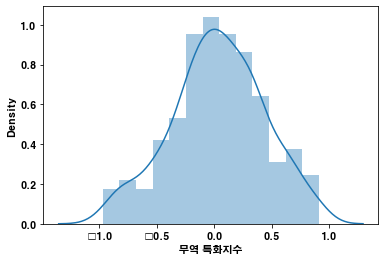

In [9]:
sns.distplot(df3['무역 특화지수'])

In [10]:
df3=df3.sort_values(by='무역 특화지수',ascending=True)
df3[df3['분류']=='내화요업제품']

,분류,수출합계,수입합계,수출 - 수입,수출 + 수입,무역 특화지수
69,내화요업제품,300079586,3403655211,-3103575625,3703734797,-0.837958


In [11]:
df4.sort_values(by='무역특화지수',ascending=True)

,분류,수출합,수입합,수출- 수입,수출 +수입,무역특화지수
13,반도체·디스플레이장비,48561951801,121537493686,-72975541885,170099445487,-0.429017
15,계측장비,28614994614,44972141520,-16357146906,73587136134,-0.222283
3,비금속광물제품,24635510401,38205630245,-13570119844,62841140646,-0.215943
9,정밀기기부품,65778072699,66257609465,-479536766,132035682164,-0.003632
12,산업공정장비,54040383548,47675226761,6365156787,101715610309,0.062578
4,1차금속제품,305222756194,259985762124,45236994070,565208518318,0.080036
6,일반기계부품,251339476722,198892914150,52446562572,450232390872,0.116488
5,금속가공제품,71075484910,48134432351,22941052559,119209917261,0.192442
1,화학물질및화학제품,511987145602,314783663563,197203482039,826770809165,0.238523
7,전기장비부품,247686054849,147586039958,100100014891,395272094807,0.253243


In [12]:
df3=df3.sort_values(by='무역 특화지수',ascending=True)
df3[df3['분류']=='기타분류안된비금속광물제품']

,분류,수출합계,수입합계,수출 - 수입,수출 + 수입,무역 특화지수
77,기타분류안된비금속광물제품,1548144862,3544072986,-1995928124,5092217848,-0.391957


In [13]:
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False

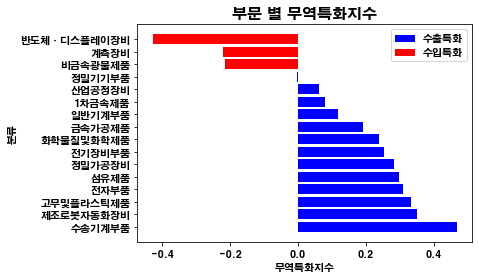

In [14]:
## 중분류 중 수입의존도가 높은 3개 부문
name = ['수송기계부품','제조로봇자동화장비','고무및플라스틱제품','전자부품','섬유제품','정밀가공장비','전기장비부품','화학물질및화학제품','금속가공제품','일반기계부품','1차금속제품','산업공정장비','정밀기기부품']
index = [0.468834,0.351681,0.332332,0.308291,0.298887,0.281607,0.253243,0.238523,0.192442,0.116488,0.080036,0.062578,-0.003632]
name2= ['비금속광물제품','계측장비','반도체·디스플레이장비']
index2= [-0.215943,-0.222283,-0.429017]
plt.barh(name,index,color='blue',label='수출특화')
plt.barh(name2,index2,color='red',label='수입특화')
plt.xlabel("무역특화지수")
plt.ylabel("분류")
plt.title("부문 별 무역특화지수",fontsize=15)
plt.legend()
plt.show()


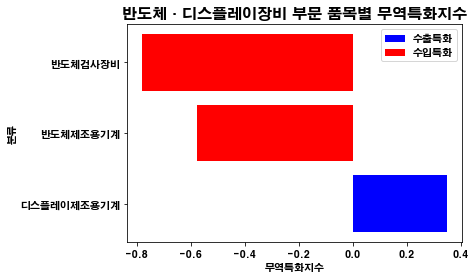

In [15]:
name = ['디스플레이제조용기계']
index = [0.348353]
name2= ['반도체제조용기계','반도체검사장비']
index2= [-0.576375,-0.777913]


plt.barh(name,index,color='blue',label='수출특화')
plt.barh(name2,index2,color='red',label='수입특화')
plt.xlabel("무역특화지수")
plt.ylabel("분류")
plt.title("반도체·디스플레이장비 부문 품목별 무역특화지수",fontsize=15)
plt.legend()
plt.show()

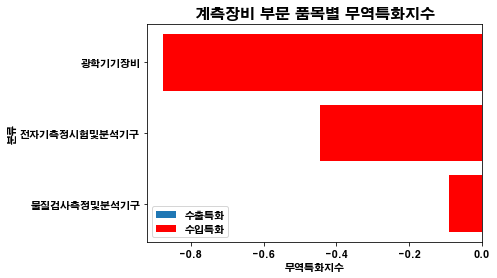

In [16]:
name = []
index = []
name2= ['물질검사측정및분석기구','전자기측정시험및분석기구','광학기기장비']
index2= [-0.091127,-0.446225,-0.875333]


plt.barh(name,index,color='blue',label='수출특화')
plt.barh(name2,index2,color='red',label='수입특화')
plt.xlabel("무역특화지수")
plt.ylabel("분류")
plt.title("계측장비 부문 품목별 무역특화지수",fontsize=15)
plt.legend()
plt.show()

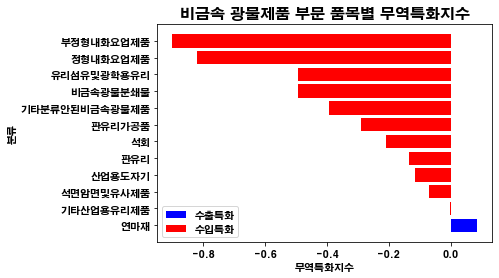

In [17]:
name = ['연마재']
index = [0.085128]
name2= ['기타산업용유리제품','석면암면및유사제품','산업용도자기','판유리','석회','판유리가공품','기타분류안된비금속광물제품','비금속광물분쇄물','유리섬유및광학용유리','정형내화요업제품','부정형내화요업제품']
index2= [-0.001396,-0.069974,-0.114853,-0.133776,-0.210583,-0.288649,-0.391957,-0.492747,-0.494522,-0.81999,-0.900076]


plt.barh(name,index,color='blue',label='수출특화')
plt.barh(name2,index2,color='red',label='수입특화')
plt.xlabel("무역특화지수")
plt.ylabel("분류")
plt.title("비금속 광물제품 부문 품목별 무역특화지수",fontsize=15)
plt.legend()
plt.show()

In [18]:
df3=df3.sort_values(by='무역 특화지수',ascending=True)
df3[df3['분류']=='판유리']

,분류,수출합계,수입합계,수출 - 수입,수출 + 수입,무역 특화지수
63,판유리,5556396158,7272616562,-1716220404,12829012720,-0.133776


In [19]:
## 위에서 선정된 수입의존도가 높은 3개 부문에 대한 여기부터 단순회귀 귀하는 과정

In [20]:
region =  pd.read_excel('ML용 지역.xlsx')
worker =  pd.read_excel('ML용 종사자수.xlsx')

In [21]:
region

,지역,사업체수\n(2001),사업체수\n(2002),사업체수\n(2003),사업체수\n(2004),사업체수\n(2005),사업체수\n(2006),사업체수\n(2007),사업체수\n(2008),사업체수\n(2009),사업체수\n(2010),사업체수\n(2011),사업체수\n(2012),사업체수\n(2013),사업체수\n(2014),사업체수\n(2015),사업체수\n(2016),사업체수\n(2017),사업체수\n(2018),사업체수\n(2019)
0,서울비금속광물제품사업체수,17,20,20,16,21,17,21,21,19,18,12,11,0,8,10,11,9,8,10
1,서울비금속광물제품생산액,34752,37967,37305,28358,68769,52157,50660,61520,59214,100411,30005,28390,0,31566,28937,30892,39200,39199,40121
2,인천비금속광물제품사업체수,40,41,38,38,35,41,41,43,43,45,38,40,42,46,44,37,39,39,37
3,인천비금속광물제품생산액,227407,252415,235138,276637,256565,208096,204825,210533,277025,353753,200996,171503,202860,204659,188385,160562,168738,197292,176164
4,경기비금속광물제품사업체수,139,158,146,158,157,159,176,178,156,184,158,158,157,162,185,188,208,202,206
5,경기비금속광물제품생산액,1092593,1151952,1172972,1349005,1158556,1157072,1389206,1679917,1749075,2317833,2612634,2464389,2360523,2555415,2634823,2870926,2740280,2763253,2472936
6,대구비금속광물제품사업체수,19,16,16,18,22,21,21,18,19,21,24,25,21,22,21,21,21,22,24
7,대구비금속광물제품생산액,53591,61185,68099,88654,84523,99454,102417,102982,94457,165634,182683,158752,155215,135243,124142,117293,135963,119085,119291
8,경북비금속광물제품사업체수,64,65,69,73,80,86,81,77,81,88,84,92,101,97,100,94,100,95,102
9,경북비금속광물제품생산액,1941441,1914062,1786268,2031476,2178289,2269834,2215826,2859032,3171975,3941912,3220392,3394037,2771404,2442280,2129075,2052280,2100366,2172530,2118234


In [22]:
merge3=region.set_index('지역')
merge3
merged_transpose = merge3.transpose() #행 열 전환
merged_transpose2=merged_transpose.reset_index()
merged_transpose3=merged_transpose2.rename(columns={'index':'년월'})
merged_transpose4=merged_transpose3.rename(columns={'지역':''})
region_raw=merged_transpose4
region_raw

지역,년월,서울비금속광물제품사업체수,서울비금속광물제품생산액,인천비금속광물제품사업체수,인천비금속광물제품생산액,경기비금속광물제품사업체수,경기비금속광물제품생산액,대구비금속광물제품사업체수,대구비금속광물제품생산액,경북비금속광물제품사업체수,...,울산계측장비사업체수,울산계측장비생산액,경남계측장비사업체수,경남계측장비생산액,대전계측장비사업체수,대전계측장비생산액,충북계측장비사업체수,충북계측장비생산액,충남계측장비사업체수,충남계측장비생산액
0,사업체수\n(2001),17,34752,40,227407,139,1092593,19,53591,64,...,0,0,7,51249,7,11293,0,0,3,2942
1,사업체수\n(2002),20,37967,41,252415,158,1151952,16,61185,65,...,0,0,10,83529,12,20964,0,0,3,5737
2,사업체수\n(2003),20,37305,38,235138,146,1172972,16,68099,69,...,0,0,8,49093,14,20464,0,0,0,0
3,사업체수\n(2004),16,28358,38,276637,158,1349005,18,88654,73,...,0,0,9,59796,17,32623,0,0,0,0
4,사업체수\n(2005),21,68769,35,256565,157,1158556,22,84523,80,...,0,0,8,51600,16,37025,0,0,0,0
5,사업체수\n(2006),17,52157,41,208096,159,1157072,21,99454,86,...,0,0,8,51993,22,66659,0,0,0,0
6,사업체수\n(2007),21,50660,41,204825,176,1389206,21,102417,81,...,0,0,7,30840,15,50118,0,0,5,98165
7,사업체수\n(2008),21,61520,43,210533,178,1679917,18,102982,77,...,0,0,9,34454,20,72715,0,0,3,10705
8,사업체수\n(2009),19,59214,43,277025,156,1749075,19,94457,81,...,0,0,11,45317,18,65851,0,0,4,8797
9,사업체수\n(2010),18,100411,45,353753,184,2317833,21,165634,88,...,0,0,16,59392,17,90736,0,0,5,24063


In [23]:
worker

,종사자수와 품명,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,10~50비금속광물제품사업체수,381,407,400,433,455,473,499,473,461,516,477,485,508,529,559,540,594,584,597
1,10~50비금속광물제품생산액,857558,981719,1006264,1028236,1171198,1331080,1435088,1599197,1734431,2920543,2053950,1930980,2178330,2464483,2630042,2523788,2824239,2901521,2700172
2,10~50반도체·디스플레이장비사업체수,187,193,223,268,318,341,388,355,345,433,393,406,420,431,414,437,494,492,531
3,10~50반도체·디스플레이장비생산액,416490,512713,713280,1130320,1293059,1505747,1558901,1653280,1445533,2856050,2526511,2193041,2481471,2781884,2645167,2872527,4143188,3873972,3524955
4,10~50계측장비사업체수,135,130,138,159,178,192,180,195,219,239,262,251,251,268,271,263,258,251,269
5,10~50계측장비생산액,256479,252617,345025,437268,448389,460911,519186,568570,682222,939708,872808,968905,918608,1039619,1105010,1059970,1024422,1181079,1005903
6,50~300비금속광물제품사업체수,73,71,74,87,87,90,90,91,88,103,92,96,101,96,95,86,90,84,100
7,50~300비금속광물제품생산액,1129545,1561556,1503129,1865621,2104352,2591674,2547602,2975065,2818117,4232178,3747358,3655891,4063365,3068021,3627134,3435122,3280517,3306085,3459234
8,50~300반도체·디스플레이장비사업체수,61,60,68,69,96,103,121,124,107,123,129,136,151,144,152,162,183,197,199
9,50~300반도체·디스플레이장비생산액,766329,827916,1337302,2326060,2800081,3127737,3406770,3173820,2961280,5141763,5707148,4262887,5094981,4627338,5775621,6886685,10680358,10602851,8918766


In [31]:
len(region_raw.columns)

81

In [24]:
mergeg3=worker.set_index('종사자수와 품명')
mergeg3
merged_transposed = mergeg3.transpose() #행 열 전환
merged_transposed2=merged_transposed.reset_index()
merged_transposed3=merged_transposed2.rename(columns={'index':'년월'})
merged_transposed4=merged_transposed3.rename(columns={'종사자수와 품명':''})
worker_raw=merged_transposed4
worker_raw

종사자수와 품명,년월,10~50비금속광물제품사업체수,10~50비금속광물제품생산액,10~50반도체·디스플레이장비사업체수,10~50반도체·디스플레이장비생산액,10~50계측장비사업체수,10~50계측장비생산액,50~300비금속광물제품사업체수,50~300비금속광물제품생산액,50~300반도체·디스플레이장비사업체수,50~300반도체·디스플레이장비생산액,50~300계측장비사업체수,50~300계측장비생산액
0,2001,381,857558,187,416490,135,256479,73,1129545,61,766329,10,88570
1,2002,407,981719,193,512713,130,252617,71,1561556,60,827916,13,101797
2,2003,400,1006264,223,713280,138,345025,74,1503129,68,1337302,11,112482
3,2004,433,1028236,268,1130320,159,437268,87,1865621,69,2326060,12,119363
4,2005,455,1171198,318,1293059,178,448389,87,2104352,96,2800081,15,163980
5,2006,473,1331080,341,1505747,192,460911,90,2591674,103,3127737,17,161101
6,2007,499,1435088,388,1558901,180,519186,90,2547602,121,3406770,12,108896
7,2008,473,1599197,355,1653280,195,568570,91,2975065,124,3173820,15,216573
8,2009,461,1734431,345,1445533,219,682222,88,2818117,107,2961280,12,151571
9,2010,516,2920543,433,2856050,239,939708,103,4232178,123,5141763,23,467285


In [49]:
worker_raw.iloc[:,2:3]

종사자수와 품명,10~50비금속광물제품생산액
0,857558
1,981719
2,1006264
3,1028236
4,1171198
5,1331080
6,1435088
7,1599197
8,1734431
9,2920543


In [33]:
region_raw.iloc[:,3:4]

지역,인천비금속광물제품사업체수
0,40
1,41
2,38
3,38
4,35
5,41
6,41
7,43
8,43
9,45


In [41]:
print(region_raw.iloc[:,1:2].columns)

Index(['서울비금속광물제품사업체수'], dtype='object', name='지역')


In [ ]:
region_raw.iloc[:,2:3]

In [54]:
def splitmode(x,y) :
    train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,test_size=0.2)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    y_predict=lr.predict(test_x)
    r2 = r2_score(test_y,y_predict)
    print(x.columns,'의결정계수는 :',r2.round(2))
    print(x.columns,'의함수는 y =',lr.coef_.round(1),'x','+',lr.intercept_.round(1))
    
for i in range(1,len(region_raw.columns),2):
    splitmode(region_raw.iloc[:,i:i+1],region_raw.iloc[:,i+1:i+2]) 
    #splitmod(region_raw.iloc[:,1:2],region_raw.iloc[:,2:3])
    #splitmod(region_raw.iloc[:,3:4],region_raw.iloc[:,4:5]) 
    

Index(['서울비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : -5.65
Index(['서울비금속광물제품사업체수'], dtype='object', name='지역') 의함수는 y = [[2523.1]] x + [6516.6]
Index(['인천비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : -3.87
Index(['인천비금속광물제품사업체수'], dtype='object', name='지역') 의함수는 y = [[6409.2]] x + [-34617.8]
Index(['경기비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : 0.27
Index(['경기비금속광물제품사업체수'], dtype='object', name='지역') 의함수는 y = [[22546.4]] x + [-1873603.9]
Index(['대구비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : -0.1
Index(['대구비금속광물제품사업체수'], dtype='object', name='지역') 의함수는 y = [[10880.1]] x + [-105989.9]
Index(['경북비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : -3.28
Index(['경북비금속광물제품사업체수'], dtype='object', name='지역') 의함수는 y = [[7849.9]] x + [1864922.2]
Index(['광주비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : 0.64
Index(['광주비금속광물제품사업체수'], dtype='object', name='지역') 의함수는 y = [[6552.1]] x + [-23751.1]
Index(['전북비금속광물제품사업체수'], dtype='object', name='지역') 의결정계수는 : 0.32
Index(['전

In [53]:
def splitmode(x,y) :
    train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8,test_size=0.2)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    y_predict=lr.predict(test_x)
    r2 = r2_score(test_y,y_predict)
    print(x.columns,'의결정계수는 :',r2.round(2))
    print(x.columns,'의함수는 y =',lr.coef_.round(1),'x','+',lr.intercept_.round(1))
    
for i in range(1,len(worker_raw.columns),2):
    splitmode(worker_raw.iloc[:,i:i+1],worker_raw.iloc[:,i+1:i+2]) 
   

Index(['10~50비금속광물제품사업체수'], dtype='object', name='종사자수와 품명') 의결정계수는 : -13.56
Index(['10~50비금속광물제품사업체수'], dtype='object', name='종사자수와 품명') 의함수는 y = [[9709.2]] x + [-2829493.6]
Index(['10~50반도체·디스플레이장비사업체수'], dtype='object', name='종사자수와 품명') 의결정계수는 : 0.9
Index(['10~50반도체·디스플레이장비사업체수'], dtype='object', name='종사자수와 품명') 의함수는 y = [[10778.8]] x + [-1915921.1]
Index(['10~50계측장비사업체수'], dtype='object', name='종사자수와 품명') 의결정계수는 : 0.95
Index(['10~50계측장비사업체수'], dtype='object', name='종사자수와 품명') 의함수는 y = [[6157.1]] x + [-590605.4]
Index(['50~300비금속광물제품사업체수'], dtype='object', name='종사자수와 품명') 의결정계수는 : -5.34
Index(['50~300비금속광물제품사업체수'], dtype='object', name='종사자수와 품명') 의함수는 y = [[91545.]] x + [-5305171.]
Index(['50~300반도체·디스플레이장비사업체수'], dtype='object', name='종사자수와 품명') 의결정계수는 : 0.26
Index(['50~300반도체·디스플레이장비사업체수'], dtype='object', name='종사자수와 품명') 의함수는 y = [[64944.7]] x + [-3401540.7]
Index(['50~300계측장비사업체수'], dtype='object', name='종사자수와 품명') 의결정계수는 : 0.37
Index(['50~300계측장비사업체수'], dtype='object', name

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(train_x,train_y)

In [ ]:
## vaildatoin 과정
y_predict1=lr.predict(test_x)
r2 = r2_score(test_y,y_predict1)
r2

In [ ]:
print(lr.intercept_, lr.coef_)